In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, BayesianRidge, ARDRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from vpk import VPK
from collections import defaultdict
import seaborn as sns
from vpk_bootstrap import VPK_bootstrap

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = pd.read_excel('data/MgAgAs.xls')
data.shape

(176, 94)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(data.drop(columns=['Compound', 'a, A']).to_numpy(),
                                                    data['a, A'].to_numpy(),
                                                    train_size=0.8,
                                                    random_state=42)
X_train.shape, X_valid.shape

((140, 92), (36, 92))

In [317]:
y_train

array([6.643 , 6.148 , 6.117 , 6.61  , 6.045 , 6.554 , 6.238 , 6.373 ,
       6.415 , 6.262 , 6.553 , 6.747 , 6.719 , 6.088 , 6.246 , 5.883 ,
       6.299 , 6.778 , 6.256 , 6.4558, 6.304 , 6.645 , 6.238 , 6.385 ,
       6.368 , 6.135 , 5.958 , 6.76  , 5.941 , 6.676 , 6.624 , 6.391 ,
       6.213 , 6.754 , 6.534 , 6.662 , 5.8971, 6.4194, 6.34  , 6.728 ,
       6.21  , 6.148 , 6.694 , 6.246 , 6.068 , 6.1344, 6.614 , 6.168 ,
       6.73  , 6.18  , 6.321 , 6.512 , 6.262 , 6.308 , 6.237 , 6.048 ,
       6.495 , 6.218 , 6.729 , 6.616 , 6.65  , 5.957 , 6.66  , 6.419 ,
       6.78  , 5.927 , 5.883 , 6.617 , 6.718 , 6.5   , 6.479 , 6.152 ,
       6.574 , 6.508 , 6.47  , 6.4523, 5.8   , 5.912 , 6.594 , 6.253 ,
       6.779 , 5.872 , 6.032 , 6.298 , 6.323 , 6.62  , 6.31  , 6.224 ,
       6.4052, 5.935 , 6.179 , 6.54  , 6.261 , 6.247 , 6.66  , 6.564 ,
       6.538 , 6.308 , 6.17  , 5.8823, 6.829 , 6.435 , 5.953 , 5.903 ,
       6.698 , 6.411 , 6.64  , 6.566 , 6.145 , 6.065 , 6.2532, 6.158 ,
      

In [390]:
vpk_mean = VPK('mean', tau=0.0)
vpk_mean.fit(X_train, y_train, X_train, y_train)

  0%|          | 0/6274 [00:00<?, ?it/s]

IOStream.flush timed out


In [391]:
vpk_corr = VPK('corr', tau=0.0)
vpk_corr.fit(X_train, y_train, X_train, y_train)

  0%|          | 0/6274 [00:00<?, ?it/s]

In [392]:
vpk_linear = VPK('linear', tau=0.0)
vpk_linear.fit(X_train, y_train, X_train, y_train)

  0%|          | 0/6274 [00:00<?, ?it/s]

In [430]:
ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

elastic = ElasticNet()
elastic.fit(X_train, y_train)

bayesianRidge = BayesianRidge()
bayesianRidge.fit(X_train, y_train)

ardRegression = ARDRegression()
ardRegression.fit(X_train, y_train)

ARDRegression()

In [424]:
vpk_mean.set_tau(0., X_train, y_train)

In [425]:
(r2_score(y_valid, vpk_mean.predict(X_valid)),
np.corrcoef(y_valid, vpk_mean.predict(X_valid))[0, 1])

(0.5655217880158279, 0.7938247378196697)

In [426]:
vpk_corr.set_tau(0, X_train, y_train)

In [427]:
(r2_score(y_valid, vpk_corr.predict(X_valid)),
np.corrcoef(y_valid, vpk_corr.predict(X_valid))[0, 1])

(0.5977315215229724, 0.8098694916793185)

In [428]:
(r2_score(y_valid, vpk_linear.predict(X_valid)),
np.corrcoef(y_valid, vpk_linear.predict(X_valid))[0, 1])

(0.9527248114569771, 0.9765784118334274)

In [433]:
scores = []
for tau in tqdm(np.linspace(0, 1, 101)):
    vpk_corr.set_tau(tau,  X_train, y_train)
    scores.append(r2_score(y_valid, vpk_corr.predict(X_valid)))

100%|█████████████████████████████████████████| 101/101 [02:41<00:00,  1.60s/it]


[]

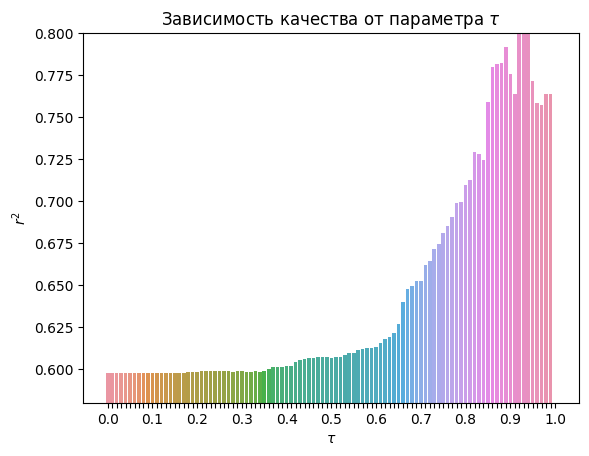

In [436]:
ax = sns.barplot(x = np.linspace(0, 1, 101), y=scores)
ax.set_ylim(0.58, 0.8)
ax.set_xticks(np.arange(0, 101), labels=[round(e, 2) if i % 10 == 0 else '' for i, e in enumerate(np.linspace(0, 1, 101))])
ax.set_title('Зависимость качества от параметра $\\tau$')
ax.set_xlabel('$\\tau$')
ax.set_ylabel('$r^2$')
plt.savefig('pics/tau2.pdf')

plt.plot()

In [423]:
vpk_linear.set_tau(0,  X_train, y_train)

In [424]:
(r2_score(y_valid, vpk_linear.predict(X_valid)), 
np.corrcoef(y_valid, vpk_linear.predict(X_valid))[0, 1])

(0.9527248114569771, 0.9765784118334274)

In [655]:
vpk_linear.head.coef_

array([ 2.61698778e-03,  2.73654839e-03, -4.54363387e-03, ...,
        1.03316369e-03, -9.00233111e-05,  1.25671689e-03])

In [653]:
vpk_linear1.corr_coefs[vpk_linear1.head.coef_.argmax()]

0.24352460550378408

In [425]:
(r2_score(y_valid, ridge.predict(X_valid)), 
np.corrcoef(y_valid, ridge.predict(X_valid))[0, 1])

(0.9603040751826714, 0.9808898559319257)

In [426]:
(r2_score(y_valid, lasso.predict(X_valid)), 
np.corrcoef(y_valid, lasso.predict(X_valid))[0, 1])

(0.8426869397354733, 0.9224016185194197)

In [427]:
(r2_score(y_valid, elastic.predict(X_valid)), 
np.corrcoef(y_valid, elastic.predict(X_valid))[0, 1])

(0.8849349206544135, 0.9426568575055609)

In [431]:
(r2_score(y_valid, ardRegression.predict(X_valid)), 
np.corrcoef(y_valid, ardRegression.predict(X_valid))[0, 1])

(0.9110981150574496, 0.9581442765415225)

In [429]:
(r2_score(y_valid, bayesianRidge.predict(X_valid)), 
np.corrcoef(y_valid, bayesianRidge.predict(X_valid))[0, 1])

(0.9438197369762207, 0.9726531973698557)

In [505]:
d = defaultdict(int)
for comb in vpk_linear1.ans:
    d[len(comb)] += 1
d = np.array(sorted(d.items(), key=lambda x: x[0]))

[]

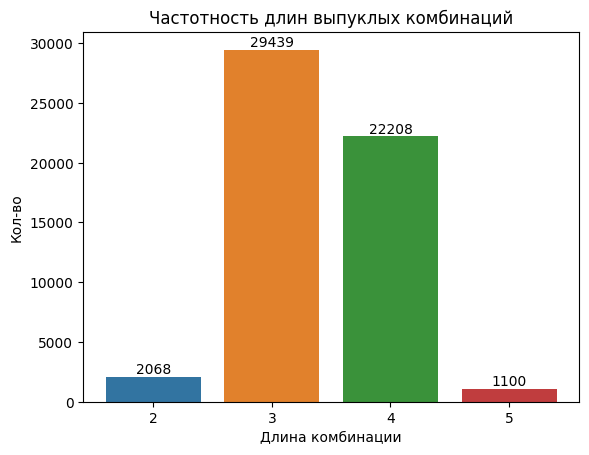

In [507]:
ax = sns.barplot(x = d[:, 0], y=d[:, 1])
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title('Частотность длин выпуклых комбинаций')
ax.set_xlabel('Длина комбинации')
ax.set_ylabel('Кол-во')
plt.savefig('pics/vpk_lens2.pdf')
plt.plot()

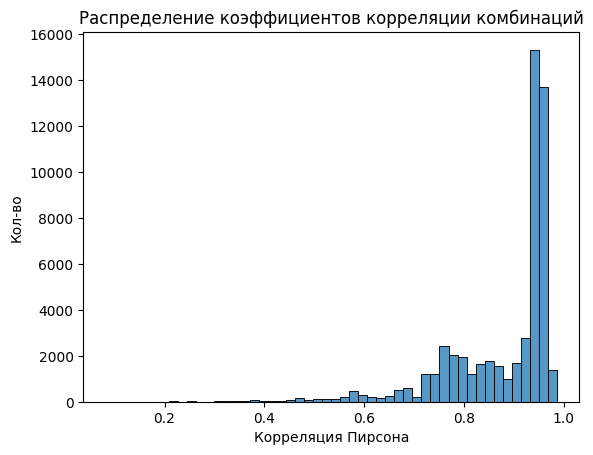

In [508]:
ax = sns.histplot(vpk_linear1.corr_coefs, bins=50)
ax.set_title('Распределение коэффициентов корреляции комбинаций')
ax.set_xlabel('Корреляция Пирсона')
ax.set_ylabel('Кол-во')
plt.savefig('pics/cor_coef2.pdf')
plt.show()

In [373]:
data1 = pd.read_excel('data/task519.xls')
data1.shape

(92, 100)

In [446]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(data1.drop(columns=['Compound', 'c, A']).to_numpy(),
                                                    data1['c, A'].to_numpy(),
                                                    train_size=0.8,
                                                    random_state=42)
X_train1.shape, X_valid1.shape

((73, 98), (19, 98))

In [447]:
vpk_linear1 = VPK('linear')
vpk_linear1.fit(X_train1, y_train1, X_train1, y_train1)

  0%|          | 0/7758 [00:00<?, ?it/s]

In [448]:
vpk_mean1 = VPK('mean', tau=0)
vpk_mean1.fit(X_train1, y_train1, X_train1, y_train1)

  0%|          | 0/7758 [00:00<?, ?it/s]

In [449]:
vpk_corr1 = VPK('corr', tau=0)
vpk_corr1.fit(X_train1, y_train1, X_train1, y_train1)

  0%|          | 0/7758 [00:00<?, ?it/s]

In [450]:
len(vpk_linear1.corr_coefs[vpk_corr1.corr_coefs>0.9])

34165

In [451]:
ridge1 = Ridge()
ridge1.fit(X_train1, y_train1)

lasso1 = Lasso()
lasso1.fit(X_train1, y_train1)

elastic1 = ElasticNet()
elastic1.fit(X_train1, y_train1)

bayesianRidge1 = BayesianRidge()
bayesianRidge1.fit(X_train1, y_train1)

ardRegression1 = ARDRegression()
ardRegression1.fit(X_train1, y_train1)

/Users/nikto/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e-03, tolerance: 1.103e-03
  model = cd_fast.enet_coordinate_descent(


ARDRegression()

In [452]:
(r2_score(y_valid1, vpk_mean1.predict(X_valid1)),
np.corrcoef(y_valid1, vpk_mean1.predict(X_valid1))[0, 1])

(0.8993016791000259, 0.9488888020990199)

In [453]:
(r2_score(y_valid1, vpk_corr1.predict(X_valid1)),
np.corrcoef(y_valid1, vpk_corr1.predict(X_valid1))[0, 1])

(0.8815205163996962, 0.9389344900165661)

In [454]:
(r2_score(y_valid1, vpk_linear1.predict(X_valid1)),
np.corrcoef(y_valid1, vpk_linear1.predict(X_valid1))[0, 1])

(0.9613236900099892, 0.9813703661561222)

In [455]:
(r2_score(y_valid1, ridge1.predict(X_valid1)),
np.corrcoef(y_valid1, ridge1.predict(X_valid1))[0, 1])

(0.9610577602887067, 0.9810225893824458)

In [456]:
(r2_score(y_valid1, lasso1.predict(X_valid1)),
np.corrcoef(y_valid1, lasso1.predict(X_valid1))[0, 1])

(0.9492390769243249, 0.9749719261114822)

In [457]:
(r2_score(y_valid1, elsatic1.predict(X_valid1)),
np.corrcoef(y_valid1, elsatic1.predict(X_valid1))[0, 1])

(0.9527384579637779, 0.976637191963663)

In [458]:
(r2_score(y_valid1, ardRegression1.predict(X_valid1)), 
np.corrcoef(y_valid1, ardRegression1.predict(X_valid1))[0, 1])

(0.9626908508316079, 0.9821881530304801)

In [459]:
(r2_score(y_valid1, bayesianRidge1.predict(X_valid1)), 
np.corrcoef(y_valid1, bayesianRidge1.predict(X_valid1))[0, 1])

(0.9623971064677439, 0.9821522692173137)

In [593]:
a = np.array([0.1,0.6,0.3])
b = np.array([0.2,0.3,0.5])

In [615]:
def sum_divakar2(a):
    def left_sum(a):
        n = len(a)
        N = 2*n-1
        p = np.zeros((n,n),dtype=a.dtype)
        ap = np.concatenate((a,p),axis=1)
        return ap.ravel()[:n*N].reshape(n,-1).sum(0)

    return left_sum(a)

In [623]:
(a[None, :] * b[:, None]) / (a[None, :] * b[:, None]).sum()

array([[0.02, 0.12, 0.06],
       [0.03, 0.18, 0.09],
       [0.05, 0.3 , 0.15]])

In [624]:
sum_divakar2((a[None, :] * b[:, None]) / (a[None, :] * b[:, None]).sum())

array([0.02, 0.15, 0.29, 0.39, 0.15])

In [638]:
np.exp(np.log(a[None, :]) + np.log(b[:, None])) / np.exp(np.log(a[None, :]) + np.log(b[:, None])).sum()

array([[0.02, 0.12, 0.06],
       [0.03, 0.18, 0.09],
       [0.05, 0.3 , 0.15]])

In [630]:
sum_divakar2(((np.log(a[None, :]) + np.log(b[:, None])) / (np.log(a[None, :]) + np.log(b[:, None])).sum()))

array([0.17331444, 0.24928519, 0.33333333, 0.1600189 , 0.08404815])

In [609]:
a_sample = np.random.choice([0, 1, 2], 1000_000, p=a)
b_sample = np.random.choice([0,1,2], 1000_000, p=b)
c_sample = sorted(a_sample + b_sample)
v, counts = np.unique(c_sample, return_counts=True)

In [610]:
v, counts

(array([0, 1, 2, 3, 4]), array([ 20095, 150058, 290022, 389286, 150539]))

In [604]:
counts/100_000

array([0.01953, 0.15059, 0.29097, 0.38894, 0.14997])

In [611]:
counts/1000_000

array([0.020095, 0.150058, 0.290022, 0.389286, 0.150539])

In [621]:
a[:-0]

array([], dtype=float64)